In [ ]:
import numpy as np

def compute_fourier_coeffs(x, y, M=None):

#some sort of batching
    """
    Compute real Fourier-series coefficients from uniform samples.

    f(t) = a0 + sum_{k=1..M}[ a_k cos(2πk t/T) + b_k sin(2πk t/T) ].

    Args:
      x : 1D array, sample positions (uniformly spaced over one period).
      y : 1D array, sample values f(x).
      M : int, number of harmonics to recover (default M = N//2).

    Returns:
      a : 1D array of length M+1, where a[0]=a0 and a[1..M] are cosine coeffs.
      b : 1D array of length M+1, with b[0]=0 and b[1..M] the sine coeffs.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    N = y.size

    # infer period T from spacing
    dx = x[1] - x[0]
    T = N * dx

    # fundamental angular frequency
    omega0 = 2 * np.pi / T

    # max harmonics
    if M is None:
        M = N // 2

    a = np.zeros(M+1)
    b = np.zeros(M+1)

    # DC term
    a[0] = np.mean(y)

    # build matrix of cos(k*omega0*x) and sin(...)
    k = np.arange(1, M+1)
    cos_mat = np.cos(np.outer(k, omega0 * x))   # shape (M, N)
    sin_mat = np.sin(np.outer(k, omega0 * x))   # shape (M, N)

    # compute a_k, b_k in one shot
    a[1:] = (2.0/N) * cos_mat.dot(y)
    b[1:] = (2.0/N) * sin_mat.dot(y)


    return a, b
# -------------------------
# Example usage:

# 1) make a test signal
N = 9
T = 1.0
x = np.linspace(0, T, N, endpoint=False)
# true FS: a0=0.5, a1=1.2, b1=-0.7, a2=0.0, b2=0.3
y = 0.5 \
    + 1.2*np.cos(2*np.pi*1*x/T) - 0.7*np.sin(2*np.pi*1*x/T) \
    + 0.0*np.cos(2*np.pi*2*x/T) + 0.3*np.sin(2*np.pi*2*x/T) + 0.8 * np.sin(2*np.pi * 4 * x / T)

# 2) recover coefficients
a, b = compute_fourier_coeffs(x, y, M=None)
print(y.shape)
print("a:", a)  # [0.5, 1.2, 0.0]
print("b:", b)  # [0.0, -0.7, 0.3]
print(len(b))


(9,)
a: [ 5.00000000e-01  1.20000000e+00  7.93117177e-17 -5.43280742e-17
 -2.39555626e-17]
b: [ 0.00000000e+00 -7.00000000e-01  3.00000000e-01 -1.12552552e-17
  8.00000000e-01]
5


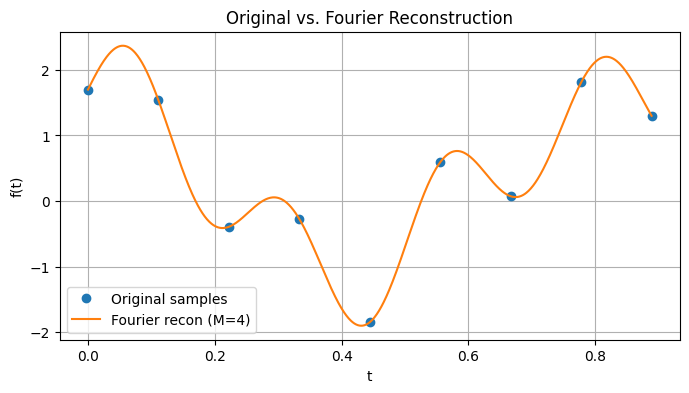

a: [ 5.00000000e-01  1.20000000e+00  7.93117177e-17 -5.43280742e-17
 -2.39555626e-17]
b: [ 0.00000000e+00 -7.00000000e-01  3.00000000e-01 -1.12552552e-17
  8.00000000e-01]


In [ ]:
#Added some plotting stuff
import numpy as np
import matplotlib.pyplot as plt

def compute_fourier_coeffs(x, y, M=None, plot=False):
    """
    Compute real Fourier-series coefficients from uniform samples, and optionally plot.

    f(t) = a0 + sum_{k=1..M}[ a_k cos(2πk t/T) + b_k sin(2πk t/T) ].

    Args:
      x : 1D array, sample positions (uniformly spaced over one period).
      y : 1D array, sample values f(x).
      M : int, number of harmonics to recover (default M = N//2).
      plot : bool, if True will plot original samples and reconstructed waveform.
    Returns:
      a : 1D array of length M+1, where a[0]=a0 and a[1..M] are cosine coeffs.
      b : 1D array of length M+1, with b[0]=0 and b[1..M] the sine coeffs.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    N = y.size

    # infer period T from spacing
    dx = x[1] - x[0]
    T = N * dx

    # fundamental angular frequency
    omega0 = 2 * np.pi / T

    # max harmonics
    if M is None:
        M = N // 2

    a = np.zeros(M+1)
    b = np.zeros(M+1)

    # DC term
    a[0] = np.mean(y)

    # build matrix of cos(k*omega0*x) and sin(...)
    k = np.arange(1, M+1)
    cos_mat = np.cos(np.outer(k, omega0 * x))   # shape (M, N)
    sin_mat = np.sin(np.outer(k, omega0 * x))   # shape (M, N)

    # compute a_k, b_k in one shot
    a[1:] = (2.0/N) * cos_mat.dot(y)
    b[1:] = (2.0/N) * sin_mat.dot(y)

    if plot:
        # create a dense t-grid for smooth plot
        t = np.linspace(x.min(), x.max(), 1000)
        # reconstruct
        recon = a[0] + sum(
            a[k]*np.cos(2*np.pi*k*t/T) + b[k]*np.sin(2*np.pi*k*t/T)
            for k in range(1, M+1)
        )

        plt.figure(figsize=(8,4))
        plt.plot(x, y, 'o', label='Original samples')
        plt.plot(t, recon, '-', label=f'Fourier recon (M={M})')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.title('Original vs. Fourier Reconstruction')
        plt.legend()
        plt.grid(True)
        plt.show()

    return a, b

# -------------------------
# Example usage:

# 1) make a test signal
N = 9
T = 1.0
x = np.linspace(0, T, N, endpoint=False)
y = (0.5
     + 1.2*np.cos(2*np.pi*1*x/T) - 0.7*np.sin(2*np.pi*1*x/T)
     + 0.0*np.cos(2*np.pi*2*x/T) + 0.3*np.sin(2*np.pi*2*x/T)
     + 0.8 * np.sin(2*np.pi * 4 * x / T))

# 2) recover coefficients AND plot
a, b = compute_fourier_coeffs(x, y, M=None, plot=True)

print("a:", a)
print("b:", b)
